<a href="https://colab.research.google.com/github/Mayank-004/Flight-customer-satisfaction-prediction/blob/main/Flight_customer_satisfaction_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [53]:
#import the train and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [54]:
train.shape

(103904, 25)

In [55]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [56]:
train=train.drop(["Unnamed: 0","id","Arrival Delay in Minutes"],axis=1)
test=test.drop(["Unnamed: 0","id","Arrival Delay in Minutes"],axis=1)

In [57]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [58]:
train.shape

(103904, 22)

In [59]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [60]:
test.shape

(25976, 22)

In [61]:
# Filtering all Categorical variables
vars_categorical = list(train.select_dtypes(['object']).columns)
print(vars_categorical)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [62]:
le=LabelEncoder()
train["Gender"]=le.fit_transform(train["Gender"])
train["Customer Type"]=le.fit_transform(train['Customer Type'])
train["Type of Travel"]=le.fit_transform(train["Type of Travel"])
train["Class"]=le.fit_transform(train["Class"])
train["satisfaction"]=le.fit_transform(train["satisfaction"])

In [63]:
train.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


In [64]:
# Filtering all Categorical variables

vars_categorical = list(test.select_dtypes(['object']).columns)
print(vars_categorical)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [65]:
le=LabelEncoder()
test["Gender"]=le.fit_transform(test["Gender"])
test["Customer Type"]=le.fit_transform(test['Customer Type'])
test["Type of Travel"]=le.fit_transform(test["Type of Travel"])
test["Class"]=le.fit_transform(test["Class"])
test["satisfaction"]=le.fit_transform(test["satisfaction"])

In [66]:
test.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,1
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,1
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,1
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,1


In [41]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### Random Forest Classification

In [98]:
## defining a reusable function to evaluate model performance

def eval_result(model_name,y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y_train, y_predtrain)
    print(f'training data accuracy {train_accuracy}')
    train_roc_auc = roc_auc_score(y_train, y_predtrain) 
    print(f' Area under the ROC curve for training data {train_roc_auc}')
    
    test_accuracy = accuracy_score(y_test, y_predtest)
    print(f'testing data accuracy {test_accuracy}')
    test_roc_auc = roc_auc_score(y_test, y_predtest) 
    print(f' Area under the ROC curve for testing data {test_roc_auc}')
    
    print(classification_report(y_test,y_predtest,digits=5))
    plot_confusion_matrix(model_name, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model_name, X_test, y_test)

In [93]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


In [ ]:
train['satisfaction'].value_counts(normalize=True) # counting number of different labels for satisfaction to check if data is balanced or not


In [ ]:
sns.countplot(train['satisfaction'])


In [102]:
# splitting train and test data into feature and target variables
X_train = train.iloc[:, 0:-1]

y_train = train.iloc[:,-1]

X_test = test.iloc[:, 0:-1]

y_test = test.iloc[:,-1]


In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.9636


In [105]:
y_predtrain = rf.predict(X_train)
y_predtest = rf.predict(X_test)

pr1=pd.DataFrame(y_predtest,columns=["Pred"])

pr1["Actual"]=y_test.values

#pr1['Percentage error']=((pr1['Actual']-pr1['Pred'])/pr1['Actual'])*100
print(f"{pr1}")


       Pred  Actual
0         1       1
1         1       1
2         0       0
3         1       1
4         0       1
...     ...     ...
25971     0       0
25972     1       1
25973     0       0
25974     1       1
25975     0       0

[25976 rows x 2 columns]


training data accuracy 0.9841007083461657
 Area under the ROC curve for training data 0.9824019399123617
testing data accuracy 0.963658761934093
 Area under the ROC curve for testing data 0.9614211190250737
              precision    recall  f1-score   support

           0    0.95652   0.97976   0.96800     14573
           1    0.97330   0.94309   0.95795     11403

    accuracy                        0.96366     25976
   macro avg    0.96491   0.96142   0.96298     25976
weighted avg    0.96389   0.96366   0.96359     25976



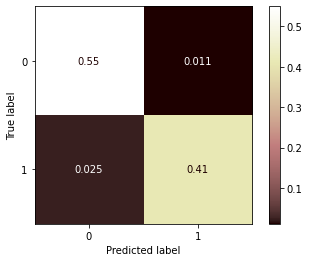

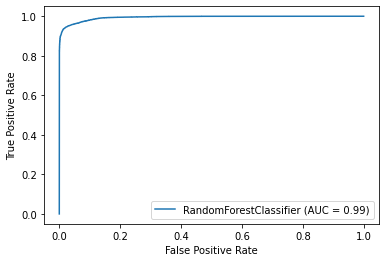

In [106]:
eval_result(rf,y_train,y_predtrain,y_test,y_predtest)

In [107]:
y_test

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [101]:
y_train

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64